# Required Packages

In [1]:
pip install getFamaFrenchFactors

In [2]:
pip install yfinance

     |████████████████████████████████| 63 kB 1.3 MB/s 
     |████████████████████████████████| 6.4 MB 11.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [3]:
pip install eventstudy

     |████████████████████████████████| 41 kB 72 kB/s 


In [4]:
pip install transformers

     |████████████████████████████████| 3.5 MB 5.2 MB/s 
     |████████████████████████████████| 67 kB 5.3 MB/s 
     |████████████████████████████████| 596 kB 43.3 MB/s 
     |████████████████████████████████| 895 kB 50.7 MB/s 
     |████████████████████████████████| 6.8 MB 35.6 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


# 3000 News from Professor

In [5]:
import pandas as pd
import numpy as np
import pandas_datareader.data as pdr
import datetime as dt

In [6]:
from google.colab import files
 
#Upload here the News3k.csv

uploaded = files.upload()

Saving News3k.csv to News3k.csv


In [7]:
news3k = pd.read_csv("News3k.csv", encoding= 'unicode_escape')
pd.set_option('display.max_colwidth', -1)
news3k.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


,key,news,img,link,date_str,date_parsed
0,0,Fireblocks acquires crypto payments processor First DAG in cash-and-stock deal,https://www.tbstat.com/wp/uploads/2020/03/fireblocks-800x450.jpg,https://coinmarketcal.com/en/news/fireblocks-acquires-crypto-payments-processor-first-dag-in-cash-and-stock-deal,16-Feb-22,2/16/2022 0:00
1,1,Crypto copy-trading protocol Housecat emerges from stealth with $3.5 million in funding,https://www.tbstat.com/wp/uploads/2022/02/20220208_Housecat-800x450.jpg,https://coinmarketcal.com/en/news/crypto-copy-trading-protocol-housecat-emerges-from-stealth-with-3-5-million-in-funding,16-Feb-22,2/16/2022 0:00
2,2,UK neobank Atom raises more than $100 million as it eyes an IPO,https://www.tbstat.com/wp/uploads/2022/01/20220117_Funding_Increase_Numbers-800x450.jpg,https://coinmarketcal.com/en/news/uk-neobank-atom-raises-more-than-100-million-as-it-eyes-an-ipo,16-Feb-22,2/16/2022 0:00
3,3,PayPal to limit some NFT transactions for its merchant-focused Seller Protection program,https://www.tbstat.com/wp/uploads/2021/08/paypal-675x450.jpeg,https://coinmarketcal.com/en/news/paypal-to-limit-some-nft-transactions-for-its-merchant-focused-seller-protection-program,15-Feb-22,2/15/2022 0:00
4,4,Ethereum wallet Rainbow raises $18 million from Reddit co-founders VC fund,https://www.tbstat.com/wp/uploads/2021/12/210921_Funding_Money_General-800x450.jpg,https://coinmarketcal.com/en/news/ethereum-wallet-rainbow-raises-18-million-from-reddit-co-founders-vc-fund,15-Feb-22,2/15/2022 0:00


In [8]:
news3k["date_parsed"]=pd.to_datetime(news3k["date_parsed"])

In [9]:
news3k.dtypes

key            int64         
news           object        
img            object        
link           object        
date_str       object        
date_parsed    datetime64[ns]
dtype: object

467 news out of the 3000 are from 2022

---
# Fama French Three Factor
<p>&nbsp;</p>
https://medium.com/the-handbook-of-coding-in-finance/estimating-stock-returns-with-fama-french-three-factor-model-in-python-1a98e3936859
<p>&nbsp;</p>
https://github.com/teobeeguan/Python-For-Finance/blob/main/Portfolio%20Management/Fama_French_Three_Factor.py


In [10]:
import yfinance as yf
import statsmodels.api as sm
import getFamaFrenchFactors as gff

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [11]:
news3k["date_parsed"].min()

Timestamp('2018-07-30 00:00:00')

In [12]:
ticker = "BTC-USD"
start = "2014-12-01"
end = "2022-02-01"

In [13]:
stock_data = yf.download(ticker, start, end, adjusted=True)

ff3_monthly = gff.famaFrench3Factor(frequency='m')
ff3_monthly.rename(columns={"date_ff_factors": 'Date'}, inplace=True)
ff3_monthly.set_index('Date', inplace=True)

[*********************100%***********************]  1 of 1 completed


In [14]:
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-01,378.248993,383.661987,376.669006,379.244995,379.244995,11763000
2014-12-02,379.250000,384.037994,377.863007,381.315002,381.315002,12364100
2014-12-03,381.721985,383.026001,374.346008,375.010010,375.010010,13340100
2014-12-04,375.717987,378.654999,367.759003,369.604004,369.604004,14529600
2014-12-05,369.441986,379.191986,365.756012,376.854004,376.854004,15181800


In [15]:
ff3_monthly

,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07-31,0.0296,-0.0238,-0.0273,0.0022
1926-08-31,0.0264,-0.0147,0.0414,0.0025
1926-09-30,0.0036,-0.0139,0.0012,0.0023
1926-10-31,-0.0324,-0.0013,0.0065,0.0032
1926-11-30,0.0253,-0.0016,-0.0038,0.0031
...,...,...,...,...
2021-09-30,-0.0437,0.0080,0.0509,0.0000
2021-10-31,0.0665,-0.0228,-0.0044,0.0000
2021-11-30,-0.0155,-0.0135,-0.0053,0.0000


### Expected Monthly Return

In [16]:
stock_returns = stock_data['Adj Close'].resample('M').last().pct_change().dropna()
stock_returns.name = "Month_Rtn"
ff_data = ff3_monthly.merge(stock_returns,on='Date')

In [17]:
X = ff_data[['Mkt-RF', 'SMB', 'HML']]
y = ff_data['Month_Rtn'] - ff_data['RF']
X = sm.add_constant(X)
ff_model = sm.OLS(y, X).fit()
print(ff_model.summary())
intercept, b1, b2, b3 = ff_model.params

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     2.838
Date:                Sat, 26 Feb 2022   Prob (F-statistic):             0.0431
Time:                        10:58:25   Log-Likelihood:                 8.2258
No. Observations:                  85   AIC:                            -8.452
Df Residuals:                      81   BIC:                             1.319
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0619      0.025      2.439      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [18]:
rf = ff_data['RF'].mean()
market_premium = ff3_monthly['Mkt-RF'].mean()
size_premium = ff3_monthly['SMB'].mean()
value_premium = ff3_monthly['HML'].mean()

expected_monthly_return = rf + b1 * market_premium + b2 * size_premium + b3 * value_premium 
expected_yearly_return = expected_monthly_return * 12
print("Expected monthly return: " + str(expected_monthly_return))
print("Expected yearly return: " + str(expected_yearly_return))

Expected monthly return: 0.010286349047723048
Expected yearly return: 0.12343618857267658


### Expected Daily Return

In [19]:
ticker = "BTC-USD"
start = "2018-01-01"
end = "2022-02-01"

In [20]:
"""
Created on Tue Aug 31 15:11:15 2021
@author: Teo Bee Guan
"""

import pandas as pd
import yfinance as yf
import statsmodels.api as sm
import getFamaFrenchFactors as gff

#ticker = 'BTC-USD'
#start = '2018-7-01'
#end = '2021-8-31'

stock_data = yf.download(ticker, start, end, adjusted=True)

[*********************100%***********************]  1 of 1 completed


In [21]:
stock_returns.name = "Day_Rtn"


In [22]:
from google.colab import files

#Upload FF3_daily.csv

uploaded = files.upload()

Saving FF3_daily.csv to FF3_daily.csv


In [23]:
ff3_daily=pd.read_csv("FF3_daily.csv",parse_dates=['date'])
ff3_daily.rename(columns={"date": 'Date'}, inplace=True)
ff3_daily.set_index('Date', inplace=True)


In [24]:
ff_data = ff3_daily.merge(stock_returns,on='Date')


In [25]:
X = ff_data[['Mkt-RF', 'SMB', 'HML']]
y = ff_data['Day_Rtn'] - ff_data['RF']
X = sm.add_constant(X)
ff_model = sm.OLS(y, X).fit()
print(ff_model.summary())
intercept, b1, b2, b3 = ff_model.params

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.092
Date:                Sat, 26 Feb 2022   Prob (F-statistic):              0.360
Time:                        10:58:56   Log-Likelihood:                 3.9632
No. Observations:                  58   AIC:                           0.07354
Df Residuals:                      54   BIC:                             8.315
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0802      0.032      2.468      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [26]:
rf = ff_data['RF'].mean()
market_premium = ff3_daily['Mkt-RF'].mean()
size_premium = ff3_daily['SMB'].mean()
value_premium = ff3_daily['HML'].mean()

expected_daily_return = rf + b1 * market_premium + b2 * size_premium + b3 * value_premium 

expected_daily_return


0.0021009521291089524

# Event Study

ff3_dailay source: https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html

In [30]:
ff3_daily=pd.read_csv("FF3_daily.csv")
ff3_daily.tail()

,date,Mkt-RF,SMB,HML,RF
25143,20211227,1.22,-0.09,0.28,0.0
25144,20211228,-0.27,-0.59,0.80,0.0
25145,20211229,0.06,-0.06,0.15,0.0
25146,20211230,-0.15,0.10,-0.38,0.0
25147,20211231,-0.31,0.06,0.53,0.0


[*********************100%***********************]  1 of 1 completed
0.1a12


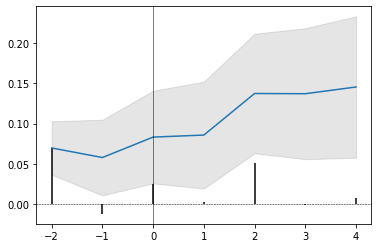

In [33]:
import pandas
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()

stock_data = pdr.get_data_yahoo(ticker, start, end)

import statsmodels.api as sm
import getFamaFrenchFactors as gff

#stock_data = yf.download(ticker, start, end, adjusted=True)

'''muting this code from professor

ff3_monthly = gff.famaFrench3Factor(frequency='m')
ff3_monthly.rename(columns={"date_ff_factors": 'date'}, inplace=True)
'''
#ff3_monthly.set_index('date', inplace=True)


## Renaming columns and formating data to later use by es.Single.import_FamaFrench

#ff3_monthly.reset_index(level=0, inplace=True)
#ff3_monthly.columns = ['date', 'Mkt-RF', 'SMB', 'HML', 'RF']
#ff3_monthly.to_csv("test_datetime_format.csv", index=False, date_format='%Y%m%d')

'''muting this code from professor

ff3_monthly.to_csv("{}_famafrench.csv".format(ticker), index=False, date_format='%Y%m%d')
'''
ff3_daily.to_csv("{}_famafrench.csv".format(ticker), index=False, date_format='%Y%m%d')



## Renaming columns and formating data to later use by es.Single.import_FamaFrench

#stock_data = pdr.get_data_yahoo(ticker, start="2017-12-01", end="2022-02-01")

stock_data[ticker] = stock_data["Adj Close"].pct_change()
stock_data = stock_data.dropna()
stock_data.reset_index(level=0, inplace=True)
stock_data = stock_data[['Date',ticker]].copy()
stock_data.columns = ['date',ticker]
stock_data.to_csv("{}_returns.csv".format(ticker), index=False, date_format='%Y-%m-%d')


## Importing Fama French 3 Factors and Stock Return

import eventstudy as es
print(es.__version__)
from eventstudy import excelExporter

import numpy as np
import matplotlib.pyplot as plt


es.Single.import_FamaFrench("{}_famafrench.csv".format(ticker))
es.Single.import_returns("{}_returns.csv".format(ticker))

event = es.Single.FamaFrench_3factor(
    security_ticker = ticker,
    event_date = np.datetime64('2020-12-28'),
    event_window = (-2,+4), 
    estimation_size = 100,
    buffer_size = 30
)

event.plot(AR=True)
plt.show()

In [34]:
event.AR

array([ 0.06980493, -0.0118392 ,  0.02529761,  0.00250216,  0.05144785,
       -0.00028216,  0.00835475])

In [35]:
event.CAR

array([0.06980493, 0.05796573, 0.08326334, 0.0857655 , 0.13721335,
       0.13693119, 0.14528594])

In [36]:
news3k["date_parsed"].nunique()

523

In [37]:
event.results(decimals=[3,5,3,5,2,2])

,AR,Std. E. AR,CAR,Std. E. CAR,T-stat,P-value
-2,0.070,0.02565,0.07 **,0.02565,2.72,0.01
-1,-0.012,0.02565,0.058,0.03628,1.60,0.11
0,0.025,0.02565,0.083 *,0.04443,1.87,0.06
1,0.003,0.02565,0.086,0.05131,1.67,0.10
2,0.051,0.02565,0.137 **,0.05736,2.39,0.02
3,-0.000,0.02565,0.137 **,0.06284,2.18,0.03
4,0.008,0.02565,0.145 **,0.06787,2.14,0.03


---
### Loop on dates for event study

In [38]:
news3k["date_parsed"].drop_duplicates()

0      2022-02-16
3      2022-02-15
21     2022-02-14
33     2022-02-12
36     2022-02-11
          ...    
3090   2018-08-27
3091   2018-08-21
3092   2018-08-14
3093   2018-08-06
3094   2018-07-30
Name: date_parsed, Length: 523, dtype: datetime64[ns]

In [39]:
dates_for_eventstudy = news3k["date_parsed"].drop_duplicates().sort_values()
dates_for_eventstudy.count()

523

In [40]:
dates_for_eventstudy.min()

Timestamp('2018-07-30 00:00:00')

In [41]:
dates_for_eventstudy.max()

Timestamp('2022-02-16 00:00:00')

In [42]:
i = 1
listAR=[]
dates=[]
for date in dates_for_eventstudy:
    #print(date)
    try:
        event = es.Single.FamaFrench_3factor(
            security_ticker = ticker,
            event_date = np.datetime64(date),
            event_window = (-2,+4), 
            estimation_size = 100,
            buffer_size = 30
        )

        #event.plot(AR=True)
        #plt.show()
        listAR.append(event.AR)
        dates.append(date)
        
    except:
        #print("Date error")
        list_nans = []
        for nans in range(event.event_window_size):
            list_nans.append(np.nan)
        listAR.append(list_nans)
        dates.append(date)
        
    #df_test = pd.DataFrame({'date':dates_for_eventstudy, 'value':list1})
    

  #  if i == 4:
  #      break
    
  #  i += 1

columns_ar=[]
for i in range(event.event_window[0],event.event_window[1]+1):
    columns_ar.append("AR"+str(i))

df_AR = pd.DataFrame(listAR, columns=columns_ar)
df_test2 = pd.DataFrame({'date':dates}).join(df_AR)

In [43]:
df_test2

,date,AR-2,AR-1,AR0,AR1,AR2,AR3,AR4
0,2018-07-30,0.010637,0.023858,0.017205,-0.060741,-0.018793,-0.011874,-0.002893
1,2018-08-06,-0.064556,0.016506,-0.019889,-0.028973,-0.058037,0.037379,-0.059797
2,2018-08-14,0.006219,-0.000882,-0.016678,0.022444,0.003533,0.039288,-0.023473
3,2018-08-21,0.010739,-0.032391,0.020892,-0.020663,0.025200,0.025512,0.008020
4,2018-08-27,0.002963,-0.009471,0.019738,0.027264,-0.008487,-0.010670,0.011195
...,...,...,...,...,...,...,...,...
518,2022-02-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
519,2022-02-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
520,2022-02-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
521,2022-02-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
df_test3 = df_test2.dropna()
df_test3["date"] = pd.to_datetime(df_test3["date"])
df_test3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,AR-2,AR-1,AR0,AR1,AR2,AR3,AR4
0,2018-07-30,0.010637,0.023858,0.017205,-0.060741,-0.018793,-0.011874,-0.002893
1,2018-08-06,-0.064556,0.016506,-0.019889,-0.028973,-0.058037,0.037379,-0.059797
2,2018-08-14,0.006219,-0.000882,-0.016678,0.022444,0.003533,0.039288,-0.023473
3,2018-08-21,0.010739,-0.032391,0.020892,-0.020663,0.025200,0.025512,0.008020
4,2018-08-27,0.002963,-0.009471,0.019738,0.027264,-0.008487,-0.010670,0.011195
...,...,...,...,...,...,...,...,...
469,2021-12-23,0.053887,-0.007328,0.042052,0.002785,-0.010408,0.004789,-0.009500
470,2021-12-24,-0.005813,0.043771,0.003097,-0.011414,0.005128,-0.008136,-0.061406
471,2021-12-25,0.041912,-0.001492,-0.010867,0.004690,-0.005885,-0.061998,-0.027376
472,2021-12-26,0.002828,-0.008574,0.015485,-0.004025,-0.062491,-0.030989,0.012307


In [45]:
'''Relevant means that at least one day had AR higher than expected montly returns * 6 (Semester)'''
n = 6  #6 is for semester

relevant_matrix_pos = df_test2.iloc[:,1:len(df_test3.columns)] > expected_monthly_return*n 
relevant_matrix_neg = df_test2.iloc[:,1:len(df_test3.columns)] < -expected_monthly_return*n

#BOOLEAN
df_test3["Relevant_pos"] = relevant_matrix_pos[list(relevant_matrix_pos.columns)].any(axis=1).astype(int)
df_test3["Relevant_neg"] = -1*(relevant_matrix_neg[list(relevant_matrix_neg.columns)].any(axis=1).astype(int))


df_test3.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,date,AR-2,AR-1,AR0,AR1,AR2,AR3,AR4,Relevant_pos,Relevant_neg
469,2021-12-23,0.053887,-0.007328,0.042052,0.002785,-0.010408,0.004789,-0.009500,0,0
470,2021-12-24,-0.005813,0.043771,0.003097,-0.011414,0.005128,-0.008136,-0.061406,0,0
471,2021-12-25,0.041912,-0.001492,-0.010867,0.004690,-0.005885,-0.061998,-0.027376,0,-1
472,2021-12-26,0.002828,-0.008574,0.015485,-0.004025,-0.062491,-0.030989,0.012307,0,-1
473,2021-12-27,-0.012521,0.003504,-0.009243,-0.062231,-0.026660,0.014263,-0.020724,0,-1


In [ ]:
print("Threshold:", expected_monthly_return*n)

In [46]:
#Days with high volatility (relevant positive and negative)
df_test3[(df_test3["Relevant_neg"] == -1) & (df_test3["Relevant_pos"] == 1)]

,date,AR-2,AR-1,AR0,AR1,AR2,AR3,AR4,Relevant_pos,Relevant_neg
17,2018-11-26,-0.105415,0.027787,-0.044454,0.013097,0.132344,0.003215,-0.054707,1,-1
35,2019-07-01,-0.034076,-0.098437,-0.033859,0.005497,0.098591,-0.068888,-0.033205,1,-1
36,2019-07-08,0.016956,0.001518,0.062245,0.020060,-0.037346,-0.076055,0.026995,1,-1
37,2019-07-15,-0.037295,-0.113478,0.064793,-0.143763,0.019750,0.094092,-0.030429,1,-1
51,2019-10-21,0.001534,0.027156,-0.001369,-0.019763,-0.073601,-0.008809,0.152764,1,-1
...,...,...,...,...,...,...,...,...,...,...
377,2021-09-20,0.020703,-0.024705,-0.087675,-0.053367,0.071113,0.030326,-0.041116,1,-1
378,2021-09-21,-0.025001,-0.088398,-0.053978,0.071635,0.031240,-0.040864,-0.000940,1,-1
379,2021-09-22,-0.086050,-0.056730,0.068820,0.028382,-0.041583,0.000786,0.025880,1,-1
404,2021-10-17,0.094219,-0.006710,0.012133,0.013849,0.034213,0.029002,-0.067220,1,-1


In [47]:
df_test3[df_test3["Relevant_neg"] == -1].count()

date            175
AR-2            175
AR-1            175
AR0             175
AR1             175
AR2             175
AR3             175
AR4             175
Relevant_pos    175
Relevant_neg    175
dtype: int64

In [48]:
df_test3[df_test3["Relevant_pos"] == 1].count()

date            169
AR-2            169
AR-1            169
AR0             169
AR1             169
AR2             169
AR3             169
AR4             169
Relevant_pos    169
Relevant_neg    169
dtype: int64

In [49]:
df_test3.date[(df_test3["Relevant_pos"]==1) | (df_test3["Relevant_pos"]==-1)]

17    2018-11-26
20    2018-12-17
32    2019-05-20
35    2019-07-01
36    2019-07-08
         ...    
404   2021-10-17
421   2021-11-04
425   2021-11-09
426   2021-11-10
444   2021-11-28
Name: date, Length: 169, dtype: datetime64[ns]

---
### Appending News with event study

In [50]:
news3k["date_parsed"]=pd.to_datetime(news3k['date_parsed'])


In [51]:
news3k_relevant = pd.merge(news3k,df_test3, left_on ="date_parsed", right_on="date").drop(columns=["date_parsed"],axis=1)

In [52]:
news3k_relevant.columns

Index(['key', 'news', 'img', 'link', 'date_str', 'date', 'AR-2', 'AR-1', 'AR0',
       'AR1', 'AR2', 'AR3', 'AR4', 'Relevant_pos', 'Relevant_neg'],
      dtype='object')

In [53]:
news3k_relevant_1 = news3k_relevant[(news3k_relevant["Relevant_pos"]==1) | (news3k_relevant["Relevant_pos"]==-1)]
news3k_relevant_1.tail()

,key,news,img,link,date_str,date,AR-2,AR-1,AR0,AR1,AR2,AR3,AR4,Relevant_pos,Relevant_neg
2567,3058,3 coins to keep an eye on | Issue #37,https://bucket.mlcdn.com/a/1227/1227214/images/934751ffa4478883974c1295822ebac6558d8c7b.png,https://coinmarketcal.com/en/news/3-coins-to-keep-an-eye-on-issue-37,8-Jul-19,2019-07-08,0.016956,0.001518,0.062245,0.020060,-0.037346,-0.076055,0.026995,1,-1
2568,3059,3 coins to keep an eye on | Issue #36,https://bucket.mlcdn.com/a/1227/1227214/images/e46429f8f9481c1f1ba2a3978f9b091f84b31aa6.png,https://coinmarketcal.com/en/news/3-coins-to-keep-an-eye-on-issue-36,1-Jul-19,2019-07-01,-0.034076,-0.098437,-0.033859,0.005497,0.098591,-0.068888,-0.033205,1,-1
2571,3062,3 coins to keep an eye on | Issue #33,https://bucket.mlcdn.com/a/1227/1227214/images/0f6812982cb57b8e02c15721c88e0c00a2060f11.png/8c568e462bbde3951d5a6cb94ec58c7813e82fbc.png,https://coinmarketcal.com/en/news/3-coins-to-keep-an-eye-on-issue-33,20-May-19,2019-05-20,-0.016846,0.120637,-0.028508,-0.003091,-0.042865,0.019596,0.014916,1,0
2583,3074,3 coins to keep an eye on | Issue #21,https://bucket.mlcdn.com/a/1227/1227214/images/6ea1bec0520d0f7caee3a75983422fa648d15c3c.png/53e1ba8d043d0826a56a13de1357a3ba44a21f76.png,https://coinmarketcal.com/en/news/3-coins-to-keep-an-eye-on-issue-21,17-Dec-18,2018-12-17,0.007402,0.005305,0.092059,0.042659,0.016539,0.106265,-0.054452,1,0
2586,3077,3 coins to keep an eye on | Issue #18,https://bucket.mlcdn.com/a/1227/1227214/images/f2c90f20df4e72d30626b420e8a7b198a09d480f.png/20ba0e65cd21c1d207980927d6963349d1f4224e.png,https://coinmarketcal.com/en/news/3-coins-to-keep-an-eye-on-issue-18,26-Nov-18,2018-11-26,-0.105415,0.027787,-0.044454,0.013097,0.132344,0.003215,-0.054707,1,-1


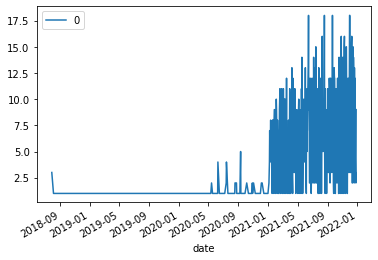

In [54]:
#More news in 2021 than other years, still growing
pd.DataFrame(news3k_relevant.groupby(news3k_relevant['date']).size()).plot()

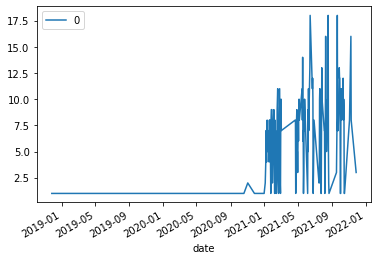

In [55]:
pd.DataFrame(news3k_relevant_1.groupby(news3k_relevant_1['date']).size()).plot()

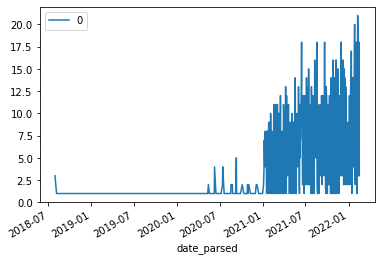

In [56]:
pd.DataFrame(news3k.groupby(news3k['date_parsed']).size()).plot()

# Polarity Analysis using Vader

### Later replaced by FinBERT

In [57]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [58]:
news3k_relevant_1['scores'] = news3k_relevant_1['news'].apply(lambda review: sid.polarity_scores(review))

news3k_relevant_1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,key,news,img,link,date_str,date,AR-2,AR-1,AR0,AR1,AR2,AR3,AR4,Relevant_pos,Relevant_neg,scores
260,751,Bank of France official: Existing regulatory frameworks constrained by DeFi characteristics,https://www.tbstat.com/wp/uploads/2019/07/france-flag-french-800x450.jpg,https://coinmarketcal.com/en/news/bank-of-france-official-existing-regulatory-frameworks-constrained-by-defi-characteristics,28-Nov-21,2021-11-28,-0.068657,-0.008857,0.062691,-0.034344,-0.039142,0.014051,-0.029041,1,-1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
261,752,Decentralized exchanges near $100 billion in monthly volume for November,https://www.tbstat.com/wp/uploads/2021/01/20210126_Defi_Gen-Daily-800x450.png,https://coinmarketcal.com/en/news/decentralized-exchanges-near-100-billion-in-monthly-volume-for-november,28-Nov-21,2021-11-28,-0.068657,-0.008857,0.062691,-0.034344,-0.039142,0.014051,-0.029041,1,-1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
262,753,"QANplatform (QANX), the quantum-resistant blockchain platform launches its CEX listing journey on Gate.io",https://d32bfp67k1q0s7.cloudfront.net/2bfe568bb508209be0acbf38828314ed.png,https://coinmarketcal.com/en/news/qanplatform-qanx-the-quantum-resistant-blockchain-platform-launches-its-cex-listing-journey-on-gate-io,28-Nov-21,2021-11-28,-0.068657,-0.008857,0.062691,-0.034344,-0.039142,0.014051,-0.029041,1,-1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
394,885,Axie Infinity co-founder joins early-stage token fund 1kx as venture partner,https://www.tbstat.com/wp/uploads/2021/05/20210513_NFT_Generic_M-800x450.jpg,https://coinmarketcal.com/en/news/axie-infinity-co-founder-joins-early-stage-token-fund-1kx-as-venture-partner,10-Nov-21,2021-11-10,0.061993,-0.013972,-0.034900,-0.005808,-0.016713,-0.000151,0.010776,1,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
395,886,Country Music Association to release NFT collection for its latest award show,https://www.tbstat.com/wp/uploads/2021/06/20210601_NFT_Generic-800x450.jpg,https://coinmarketcal.com/en/news/country-music-association-to-release-nft-collection-for-its-latest-award-show,10-Nov-21,2021-11-10,0.061993,-0.013972,-0.034900,-0.005808,-0.016713,-0.000151,0.010776,1,0,"{'neg': 0.0, 'neu': 0.759, 'pos': 0.241, 'compound': 0.5423}"


In [59]:
news3k_relevant_1['compound']  = news3k_relevant_1['scores'].apply(lambda score_dict: score_dict['compound'])
news3k_relevant_1['pos']  = news3k_relevant_1['scores'].apply(lambda score_dict: score_dict['pos'])
news3k_relevant_1['neg']  = news3k_relevant_1['scores'].apply(lambda score_dict: score_dict['neg'])

news3k_relevant_1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,key,news,img,link,date_str,date,AR-2,AR-1,AR0,AR1,AR2,AR3,AR4,Relevant_pos,Relevant_neg,scores,compound,pos,neg
260,751,Bank of France official: Existing regulatory frameworks constrained by DeFi characteristics,https://www.tbstat.com/wp/uploads/2019/07/france-flag-french-800x450.jpg,https://coinmarketcal.com/en/news/bank-of-france-official-existing-regulatory-frameworks-constrained-by-defi-characteristics,28-Nov-21,2021-11-28,-0.068657,-0.008857,0.062691,-0.034344,-0.039142,0.014051,-0.029041,1,-1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,0.000,0.0
261,752,Decentralized exchanges near $100 billion in monthly volume for November,https://www.tbstat.com/wp/uploads/2021/01/20210126_Defi_Gen-Daily-800x450.png,https://coinmarketcal.com/en/news/decentralized-exchanges-near-100-billion-in-monthly-volume-for-november,28-Nov-21,2021-11-28,-0.068657,-0.008857,0.062691,-0.034344,-0.039142,0.014051,-0.029041,1,-1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,0.000,0.0
262,753,"QANplatform (QANX), the quantum-resistant blockchain platform launches its CEX listing journey on Gate.io",https://d32bfp67k1q0s7.cloudfront.net/2bfe568bb508209be0acbf38828314ed.png,https://coinmarketcal.com/en/news/qanplatform-qanx-the-quantum-resistant-blockchain-platform-launches-its-cex-listing-journey-on-gate-io,28-Nov-21,2021-11-28,-0.068657,-0.008857,0.062691,-0.034344,-0.039142,0.014051,-0.029041,1,-1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,0.000,0.0
394,885,Axie Infinity co-founder joins early-stage token fund 1kx as venture partner,https://www.tbstat.com/wp/uploads/2021/05/20210513_NFT_Generic_M-800x450.jpg,https://coinmarketcal.com/en/news/axie-infinity-co-founder-joins-early-stage-token-fund-1kx-as-venture-partner,10-Nov-21,2021-11-10,0.061993,-0.013972,-0.034900,-0.005808,-0.016713,-0.000151,0.010776,1,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,0.000,0.0
395,886,Country Music Association to release NFT collection for its latest award show,https://www.tbstat.com/wp/uploads/2021/06/20210601_NFT_Generic-800x450.jpg,https://coinmarketcal.com/en/news/country-music-association-to-release-nft-collection-for-its-latest-award-show,10-Nov-21,2021-11-10,0.061993,-0.013972,-0.034900,-0.005808,-0.016713,-0.000151,0.010776,1,0,"{'neg': 0.0, 'neu': 0.759, 'pos': 0.241, 'compound': 0.5423}",0.5423,0.241,0.0


In [60]:
news3k_relevant_1["news"].loc[news3k_relevant_1["key"]==751]

260    Bank of France official: Existing regulatory frameworks constrained by DeFi characteristics
Name: news, dtype: object

In [61]:
news3k_relevant_1[(news3k_relevant_1["Relevant_pos"]==1) | (news3k_relevant_1["Relevant_pos"]==0)]

,key,news,img,link,date_str,date,AR-2,AR-1,AR0,AR1,AR2,AR3,AR4,Relevant_pos,Relevant_neg,scores,compound,pos,neg
260,751,Bank of France official: Existing regulatory frameworks constrained by DeFi characteristics,https://www.tbstat.com/wp/uploads/2019/07/france-flag-french-800x450.jpg,https://coinmarketcal.com/en/news/bank-of-france-official-existing-regulatory-frameworks-constrained-by-defi-characteristics,28-Nov-21,2021-11-28,-0.068657,-0.008857,0.062691,-0.034344,-0.039142,0.014051,-0.029041,1,-1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,0.000,0.0
261,752,Decentralized exchanges near $100 billion in monthly volume for November,https://www.tbstat.com/wp/uploads/2021/01/20210126_Defi_Gen-Daily-800x450.png,https://coinmarketcal.com/en/news/decentralized-exchanges-near-100-billion-in-monthly-volume-for-november,28-Nov-21,2021-11-28,-0.068657,-0.008857,0.062691,-0.034344,-0.039142,0.014051,-0.029041,1,-1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,0.000,0.0
262,753,"QANplatform (QANX), the quantum-resistant blockchain platform launches its CEX listing journey on Gate.io",https://d32bfp67k1q0s7.cloudfront.net/2bfe568bb508209be0acbf38828314ed.png,https://coinmarketcal.com/en/news/qanplatform-qanx-the-quantum-resistant-blockchain-platform-launches-its-cex-listing-journey-on-gate-io,28-Nov-21,2021-11-28,-0.068657,-0.008857,0.062691,-0.034344,-0.039142,0.014051,-0.029041,1,-1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,0.000,0.0
394,885,Axie Infinity co-founder joins early-stage token fund 1kx as venture partner,https://www.tbstat.com/wp/uploads/2021/05/20210513_NFT_Generic_M-800x450.jpg,https://coinmarketcal.com/en/news/axie-infinity-co-founder-joins-early-stage-token-fund-1kx-as-venture-partner,10-Nov-21,2021-11-10,0.061993,-0.013972,-0.034900,-0.005808,-0.016713,-0.000151,0.010776,1,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,0.000,0.0
395,886,Country Music Association to release NFT collection for its latest award show,https://www.tbstat.com/wp/uploads/2021/06/20210601_NFT_Generic-800x450.jpg,https://coinmarketcal.com/en/news/country-music-association-to-release-nft-collection-for-its-latest-award-show,10-Nov-21,2021-11-10,0.061993,-0.013972,-0.034900,-0.005808,-0.016713,-0.000151,0.010776,1,0,"{'neg': 0.0, 'neu': 0.759, 'pos': 0.241, 'compound': 0.5423}",0.5423,0.241,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2567,3058,3 coins to keep an eye on | Issue #37,https://bucket.mlcdn.com/a/1227/1227214/images/934751ffa4478883974c1295822ebac6558d8c7b.png,https://coinmarketcal.com/en/news/3-coins-to-keep-an-eye-on-issue-37,8-Jul-19,2019-07-08,0.016956,0.001518,0.062245,0.020060,-0.037346,-0.076055,0.026995,1,-1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,0.000,0.0
2568,3059,3 coins to keep an eye on | Issue #36,https://bucket.mlcdn.com/a/1227/1227214/images/e46429f8f9481c1f1ba2a3978f9b091f84b31aa6.png,https://coinmarketcal.com/en/news/3-coins-to-keep-an-eye-on-issue-36,1-Jul-19,2019-07-01,-0.034076,-0.098437,-0.033859,0.005497,0.098591,-0.068888,-0.033205,1,-1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,0.000,0.0
2571,3062,3 coins to keep an eye on | Issue #33,https://bucket.mlcdn.com/a/1227/1227214/images/0f6812982cb57b8e02c15721c88e0c00a2060f11.png/8c568e462bbde3951d5a6cb94ec58c7813e82fbc.png,https://coinmarketcal.com/en/news/3-coins-to-keep-an-eye-on-issue-33,20-May-19,2019-05-20,-0.016846,0.120637,-0.028508,-0.003091,-0.042865,0.019596,0.014916,1,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,0.000,0.0
2583,3074,3 coins to keep an eye on | Issue #21,https://bucket.mlcdn.com/a/1227/1227214/images/6ea1bec0520d0f7caee3a75983422fa648d15c3c.png/53e1ba8d043d0826a56a13de1357a3ba44a21f76.png,https://coinmarketcal.com/en/news/3-coins-to-keep-an-eye-on-issue-21,17-Dec-18,2018-12-17,0.007402,0.005305,0.092059,0.042659,0.016539,0.106265,-0.054452,1,0,"{'neg': 0.0, 'neu'

In [62]:
news3k_relevant_1.loc[(news3k_relevant_1["Relevant_pos"]==1) & (news3k_relevant_1["pos"]>0)].head(4)

,key,news,img,link,date_str,date,AR-2,AR-1,AR0,AR1,AR2,AR3,AR4,Relevant_pos,Relevant_neg,scores,compound,pos,neg
395,886,Country Music Association to release NFT collection for its latest award show,https://www.tbstat.com/wp/uploads/2021/06/20210601_NFT_Generic-800x450.jpg,https://coinmarketcal.com/en/news/country-music-association-to-release-nft-collection-for-its-latest-award-show,10-Nov-21,2021-11-10,0.061993,-0.013972,-0.03490,-0.005808,-0.016713,-0.000151,0.010776,1,0,"{'neg': 0.0, 'neu': 0.759, 'pos': 0.241, 'compound': 0.5423}",0.5423,0.241,0.0
399,890,Robinhood sees slide in Dogecoin trading interest,https://www.tbstat.com/wp/uploads/2020/07/20200708_Dogecoin-Up-800x450.jpg,https://coinmarketcal.com/en/news/robinhood-sees-slide-in-dogecoin-trading-interest,10-Nov-21,2021-11-10,0.061993,-0.013972,-0.03490,-0.005808,-0.016713,-0.000151,0.010776,1,0,"{'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'compound': 0.4588}",0.4588,0.333,0.0
400,891,"Bitcoin tops $69,000 after hot inflation numbers released",https://www.tbstat.com/wp/uploads/2021/06/20210601_Bitcoin_Generic-800x450.jpg,https://coinmarketcal.com/en/news/bitcoin-tops-69-000-after-hot-inflation-numbers-released,10-Nov-21,2021-11-10,0.061993,-0.013972,-0.03490,-0.005808,-0.016713,-0.000151,0.010776,1,0,"{'neg': 0.0, 'neu': 0.68, 'pos': 0.32, 'compound': 0.5106}",0.5106,0.320,0.0
402,893,Mining for NYCCoin to begin Wednesday with blessing from Mayor-elect Adams,https://www.tbstat.com/wp/uploads/2021/11/20211105_NYC_Mayor_Elect_Eric_Adams-800x450.png,https://coinmarketcal.com/en/news/mining-for-nyccoin-to-begin-wednesday-with-blessing-from-mayor-elect-adams,9-Nov-21,2021-11-09,0.024615,0.062264,-0.01313,-0.033243,-0.005571,-0.017249,0.000795,1,0,"{'neg': 0.0, 'neu': 0.758, 'pos': 0.242, 'compound': 0.4939}",0.4939,0.242,0.0


In [63]:
news3k_relevant_1.loc[(news3k_relevant_1["Relevant_neg"]==-1) & (news3k_relevant_1["neg"]>0)].head(4)

,key,news,img,link,date_str,date,AR-2,AR-1,AR0,AR1,AR2,AR3,AR4,Relevant_pos,Relevant_neg,scores,compound,pos,neg
791,1282,"Chainalysis used an IP-scraping block explorer to aid law enforcement, leaked docs say",https://www.tbstat.com/wp/uploads/2019/07/hacker-dark-web-hacking-800x450.jpg,https://coinmarketcal.com/en/news/chainalysis-used-an-ip-scraping-block-explorer-to-aid-law-enforcement-leaked-docs-say,21-Sep-21,2021-09-21,-0.025001,-0.088398,-0.053978,0.071635,0.031240,-0.040864,-0.000940,1,-1,"{'neg': 0.321, 'neu': 0.679, 'pos': 0.0, 'compound': -0.6369}",-0.6369,0.0,0.321
795,1286,$30M in ETH on the move after authorities confirm arrest of WEX exchange founder,https://www.tbstat.com/wp/uploads/2021/08/20210812_Ethereum_Transaction_Fees-797x450.jpg,https://coinmarketcal.com/en/news/30m-in-eth-on-the-move-after-authorities-confirm-arrest-of-wex-exchange-founder,21-Sep-21,2021-09-21,-0.025001,-0.088398,-0.053978,0.071635,0.031240,-0.040864,-0.000940,1,-1,"{'neg': 0.156, 'neu': 0.844, 'pos': 0.0, 'compound': -0.34}",-0.3400,0.0,0.156
813,1304,Hacker steals $12 million in wrapped bitcoin from DeFi platform pNetwork,https://www.tbstat.com/wp/uploads/2021/05/20210305_Rugpull_Hack_Generic-800x450.png,https://coinmarketcal.com/en/news/hacker-steals-12-million-in-wrapped-bitcoin-from-defi-platform-pnetwork,20-Sep-21,2021-09-20,0.020703,-0.024705,-0.087675,-0.053367,0.071113,0.030326,-0.041116,1,-1,"{'neg': 0.248, 'neu': 0.752, 'pos': 0.0, 'compound': -0.5106}",-0.5106,0.0,0.248
817,1308,"US officials now investigating Binance for potential insider trading, market manipulation: report",https://www.tbstat.com/wp/uploads/2019/02/Binance-Teal-800x450.jpg,https://coinmarketcal.com/en/news/us-officials-now-investigating-binance-for-potential-insider-trading-market-manipulation-report,18-Sep-21,2021-09-18,-0.006038,-0.005486,0.019458,-0.017075,-0.090804,-0.046827,0.070195,1,-1,"{'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'compound': -0.296}",-0.2960,0.0,0.167


# Sentiment analysis with FinBERT

In [64]:
news3k_relevant["news"].iloc[0]

'Mexican billionaire encourages Twitter followers to invest in Bitcoin'

In [65]:
from transformers import BertTokenizer, BertForSequenceClassification
import numpy as np

finbert = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone',num_labels=3)
tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')

sentences = ["there is a shortage of capital, and we need extra financing", 
             "growth is strong and we have plenty of liquidity", 
             "there are doubts about our finances", 
             "profits are flat"]

inputs = tokenizer(sentences, return_tensors="pt", padding=True)
outputs = finbert(**inputs)[0]

labels = {0:'neutral', 1:'positive',2:'negative'}
for idx, sent in enumerate(sentences):
    print(sent, '----', labels[np.argmax(outputs.detach().numpy()[idx])])
    
'''
there is a shortage of capital, and we need extra financing ---- negative
growth is strong and we have plenty of liquidity ---- positive
there are doubts about our finances ---- negative
profits are flat ---- neutral
'''

Downloading:   0%|          | 0.00/533 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/419M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/221k [00:00<?, ?B/s]

there is a shortage of capital, and we need extra financing ---- negative
growth is strong and we have plenty of liquidity ---- positive
there are doubts about our finances ---- negative
profits are flat ---- neutral


'\nthere is a shortage of capital, and we need extra financing ---- negative\ngrowth is strong and we have plenty of liquidity ---- positive\nthere are doubts about our finances ---- negative\nprofits are flat ---- neutral\n'

In [66]:
example = news3k_relevant["news"].iloc[749]
example

'SPELLFIRE : first NFT that you can actually touch'

In [67]:
inputs = tokenizer(example, return_tensors="pt", padding=True)
outputs = finbert(**inputs)[0]

labels = {0:'neutral', 1:'positive',2:'negative'}
#for idx, sent in enumerate(sentences):
#    print(sent, '----', labels[np.argmax(outputs.detach().numpy()[idx])])
print(outputs.detach().numpy()[0][2])
print(outputs.detach())

-3.029945
tensor([[ 4.8555, -5.6888, -3.0299]])


In [68]:
labels[np.argmax(outputs.detach().numpy()[0])]

'neutral'

In [69]:
news3k_relevant.head()

,key,news,img,link,date_str,date,AR-2,AR-1,AR0,AR1,AR2,AR3,AR4,Relevant_pos,Relevant_neg
0,491,Mexican billionaire encourages Twitter followers to invest in Bitcoin,https://www.tbstat.com/wp/uploads/2021/10/jorge-aguilar-vZ9TqSm9ZsQ-unsplash-675x450.jpg,https://coinmarketcal.com/en/news/mexican-billionaire-encourages-twitter-followers-to-invest-in-bitcoin,27-Dec-21,2021-12-27,-0.012521,0.003504,-0.009243,-0.062231,-0.02666,0.014263,-0.020724,0,-1
1,492,Bitcoin Beach wallet creator Galoy aims to replicate El Salvador project,https://www.tbstat.com/wp/uploads/2021/10/210930_Bitcoin_Funding_General-800x450.jpg,https://coinmarketcal.com/en/news/bitcoin-beach-wallet-creator-galoy-aims-to-replicate-el-salvador-project,27-Dec-21,2021-12-27,-0.012521,0.003504,-0.009243,-0.062231,-0.02666,0.014263,-0.020724,0,-1
2,493,Kraken CEO says forthcoming platform will enable NFT-collateralized loans,https://www.tbstat.com/wp/uploads/2019/09/20190926_Kraken-Overview-Daily-800x450.jpg,https://coinmarketcal.com/en/news/kraken-ceo-says-forthcoming-platform-will-enable-nft-collateralized-loans,27-Dec-21,2021-12-27,-0.012521,0.003504,-0.009243,-0.062231,-0.02666,0.014263,-0.020724,0,-1
3,494,"Popular Miami nightclub E11EVEN buys Bored Ape #11 for $400,000",https://www.tbstat.com/wp/uploads/2021/12/BAYC-11-450x450.png,https://coinmarketcal.com/en/news/popular-miami-nightclub-e11even-buys-bored-ape-11-for-400-000,27-Dec-21,2021-12-27,-0.012521,0.003504,-0.009243,-0.062231,-0.02666,0.014263,-0.020724,0,-1
4,495,Trading volume for bitcoin and ether options grew 443% in 2021,https://www.tbstat.com/wp/uploads/2020/04/20200423_Charts-Genesis-800x450.jpg,https://coinmarketcal.com/en/news/trading-volume-for-bitcoin-and-ether-options-grew-443-in-2021,27-Dec-21,2021-12-27,-0.012521,0.003504,-0.009243,-0.062231,-0.02666,0.014263,-0.020724,0,-1


In [70]:
news3k_relevant['FinBERT_positive'] = news3k_relevant['news'].apply(lambda review: finbert(**(tokenizer(review, return_tensors="pt", padding=True)))[0].detach().numpy()[0][1])

In [71]:
news3k_relevant['FinBERT_negative'] = news3k_relevant['news'].apply(lambda review: finbert(**(tokenizer(review, return_tensors="pt", padding=True)))[0].detach().numpy()[0][2])

In [72]:
news3k_relevant['FinBERT_neutral'] = news3k_relevant['news'].apply(lambda review: finbert(**(tokenizer(review, return_tensors="pt", padding=True)))[0].detach().numpy()[0][0])

In [73]:
#news3k_relevant_FinBERT = news3k_relevant.drop(['scores','compound','pos','neg'],axis=1)
news3k_relevant_FinBERT = news3k_relevant
news3k_relevant_FinBERT

,key,news,img,link,date_str,date,AR-2,AR-1,AR0,AR1,AR2,AR3,AR4,Relevant_pos,Relevant_neg,FinBERT_positive,FinBERT_negative,FinBERT_neutral
0,491,Mexican billionaire encourages Twitter followers to invest in Bitcoin,https://www.tbstat.com/wp/uploads/2021/10/jorge-aguilar-vZ9TqSm9ZsQ-unsplash-675x450.jpg,https://coinmarketcal.com/en/news/mexican-billionaire-encourages-twitter-followers-to-invest-in-bitcoin,27-Dec-21,2021-12-27,-0.012521,0.003504,-0.009243,-0.062231,-0.026660,0.014263,-0.020724,0,-1,-4.392087,-5.608654,5.893011
1,492,Bitcoin Beach wallet creator Galoy aims to replicate El Salvador project,https://www.tbstat.com/wp/uploads/2021/10/210930_Bitcoin_Funding_General-800x450.jpg,https://coinmarketcal.com/en/news/bitcoin-beach-wallet-creator-galoy-aims-to-replicate-el-salvador-project,27-Dec-21,2021-12-27,-0.012521,0.003504,-0.009243,-0.062231,-0.026660,0.014263,-0.020724,0,-1,-3.697576,-7.601124,5.348399
2,493,Kraken CEO says forthcoming platform will enable NFT-collateralized loans,https://www.tbstat.com/wp/uploads/2019/09/20190926_Kraken-Overview-Daily-800x450.jpg,https://coinmarketcal.com/en/news/kraken-ceo-says-forthcoming-platform-will-enable-nft-collateralized-loans,27-Dec-21,2021-12-27,-0.012521,0.003504,-0.009243,-0.062231,-0.026660,0.014263,-0.020724,0,-1,0.635055,-8.803724,2.001220
3,494,"Popular Miami nightclub E11EVEN buys Bored Ape #11 for $400,000",https://www.tbstat.com/wp/uploads/2021/12/BAYC-11-450x450.png,https://coinmarketcal.com/en/news/popular-miami-nightclub-e11even-buys-bored-ape-11-for-400-000,27-Dec-21,2021-12-27,-0.012521,0.003504,-0.009243,-0.062231,-0.026660,0.014263,-0.020724,0,-1,-6.155059,-4.832943,7.222365
4,495,Trading volume for bitcoin and ether options grew 443% in 2021,https://www.tbstat.com/wp/uploads/2020/04/20200423_Charts-Genesis-800x450.jpg,https://coinmarketcal.com/en/news/trading-volume-for-bitcoin-and-ether-options-grew-443-in-2021,27-Dec-21,2021-12-27,-0.012521,0.003504,-0.009243,-0.062231,-0.026660,0.014263,-0.020724,0,-1,8.759845,-8.619586,-4.789298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2601,3092,3 coins to keep an eye on | Issue #3,https://bucket.mlcdn.com/a/1227/1227214/images/b50affea07ea8df33e7e5b174b5aeeba8d10eb51.jpeg/c82a536f1c3112c8b5a2b45261a42a989b7d92ec.jpeg,https://coinmarketcal.com/en/news/3-coins-to-keep-an-eye-on-issue-3,14-Aug-18,2018-08-14,0.006219,-0.000882,-0.016678,0.022444,0.003533,0.039288,-0.023473,0,0,-6.388147,-2.931550,5.418628
2602,3093,3 coins to keep an eye on | Issue #2,https://bucket.mlcdn.com/a/1227/1227214/images/74474109a6dd89a211e8084e5d3fde6f7fd02a97.jpeg/39bf38883c0f83b1dea98918aa5db00d319d27b0.jpeg,https://coinmarketcal.com/en/news/3-coins-to-keep-an-eye-on-issue-2,6-Aug-18,2018-08-06,-0.064556,0.016506,-0.019889,-0.028973,-0.058037,0.037379,-0.059797,0,-1,-6.238639,-3.067589,5.233948
2603,3094,3 coins to keep an eye on | Issue #1,https://bucket.mlcdn.com/a/1227/1227214/images/5ec9e18e9f6c3dd5796c34e3e4e9ddfc1519755b.png/00717f30622eca47f56c060d11983c336490e3ef.png,https://coinmarketcal.com/en/news/3-coins-to-keep-an-eye-on-issue-1,30-Jul-18,2018-07-30,0.010637,0.023858,0.017205,-0.060741,-0.018793,-0.011874,-0.002893,0,0,-6.105942,-3.292527,5.357820
2604,3095,Download CoinMarketCal app on App Store,NaN,https://coinmarketcal.com/https://bit.ly/cmcal_ios_f,Download our app,2018-07-30,0.010637,0.023858,0.017205,-0.060741,-0.018793,-0.011874,-0.002893,0,0,-3.747002,-4.684376,6.642163


In [74]:
news3k_relevant_FinBERT.head()

,key,news,img,link,date_str,date,AR-2,AR-1,AR0,AR1,AR2,AR3,AR4,Relevant_pos,Relevant_neg,FinBERT_positive,FinBERT_negative,FinBERT_neutral
0,491,Mexican billionaire encourages Twitter followers to invest in Bitcoin,https://www.tbstat.com/wp/uploads/2021/10/jorge-aguilar-vZ9TqSm9ZsQ-unsplash-675x450.jpg,https://coinmarketcal.com/en/news/mexican-billionaire-encourages-twitter-followers-to-invest-in-bitcoin,27-Dec-21,2021-12-27,-0.012521,0.003504,-0.009243,-0.062231,-0.02666,0.014263,-0.020724,0,-1,-4.392087,-5.608654,5.893011
1,492,Bitcoin Beach wallet creator Galoy aims to replicate El Salvador project,https://www.tbstat.com/wp/uploads/2021/10/210930_Bitcoin_Funding_General-800x450.jpg,https://coinmarketcal.com/en/news/bitcoin-beach-wallet-creator-galoy-aims-to-replicate-el-salvador-project,27-Dec-21,2021-12-27,-0.012521,0.003504,-0.009243,-0.062231,-0.02666,0.014263,-0.020724,0,-1,-3.697576,-7.601124,5.348399
2,493,Kraken CEO says forthcoming platform will enable NFT-collateralized loans,https://www.tbstat.com/wp/uploads/2019/09/20190926_Kraken-Overview-Daily-800x450.jpg,https://coinmarketcal.com/en/news/kraken-ceo-says-forthcoming-platform-will-enable-nft-collateralized-loans,27-Dec-21,2021-12-27,-0.012521,0.003504,-0.009243,-0.062231,-0.02666,0.014263,-0.020724,0,-1,0.635055,-8.803724,2.001220
3,494,"Popular Miami nightclub E11EVEN buys Bored Ape #11 for $400,000",https://www.tbstat.com/wp/uploads/2021/12/BAYC-11-450x450.png,https://coinmarketcal.com/en/news/popular-miami-nightclub-e11even-buys-bored-ape-11-for-400-000,27-Dec-21,2021-12-27,-0.012521,0.003504,-0.009243,-0.062231,-0.02666,0.014263,-0.020724,0,-1,-6.155059,-4.832943,7.222365
4,495,Trading volume for bitcoin and ether options grew 443% in 2021,https://www.tbstat.com/wp/uploads/2020/04/20200423_Charts-Genesis-800x450.jpg,https://coinmarketcal.com/en/news/trading-volume-for-bitcoin-and-ether-options-grew-443-in-2021,27-Dec-21,2021-12-27,-0.012521,0.003504,-0.009243,-0.062231,-0.02666,0.014263,-0.020724,0,-1,8.759845,-8.619586,-4.789298


In [75]:
#Saving data to csv
news3k_relevant_FinBERT.to_csv("news3k_relevant_FinBERT.csv")


In [76]:
from google.colab import files
files.download("news3k_relevant_FinBERT.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [79]:
import json

In [82]:
#Saving data to JSON
news3k_relevant_FinBERT.to_json("news3k_relevant_FinBERT.json", orient="split")

In [83]:
from google.colab import files
files.download("news3k_relevant_FinBERT.json")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>